# DBSCAN

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

from sklearn.metrics import silhouette_score
from sklearn import cluster, datasets, mixture

np.random.seed(844)
clust1 = np.random.normal(5, 2, (1000,2))
clust2 = np.random.normal(15, 3, (1000,2))
clust3 = np.random.multivariate_normal([17,3], [[1,0],[0,1]], 1000)
clust4 = np.random.multivariate_normal([2,16], [[1,0],[0,1]], 1000)
dataset1 = np.concatenate((clust1, clust2, clust3, clust4))

# we take the first array as the second array has the cluster labels
dataset2 = datasets.make_circles(n_samples=1000, factor=.5, noise=.05)[0]

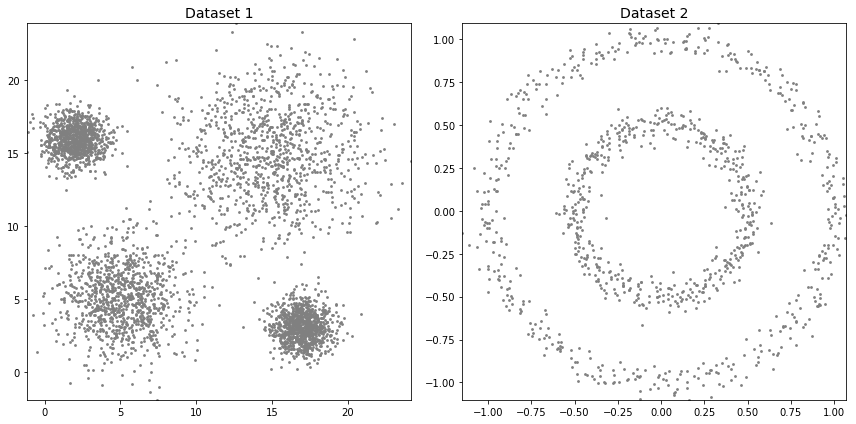

In [2]:
# plot clustering output on the two datasets
def plot_two_cluster(df1, df2, color1, color2, title1,  title2):
    fig, (ax1,ax2) = plt.subplots(1, 2)
    fig.set_size_inches(6*2, 3*2)
    ax1.set_title(title1,fontsize=14)
    ax1.set_xlim(min(df1[:,0]), max(df1[:,0]))
    ax1.set_ylim(min(df1[:,1]), max(df1[:,1]))
    ax1.scatter(df1[:, 0], df1[:, 1],s=8,lw=0,c= color1)
    
    ax2.set_title(title2,fontsize=14)
    ax2.set_xlim(min(df2[:,0]), max(df2[:,0]))
    ax2.set_ylim(min(df2[:,1]), max(df2[:,1]))
    ax2.scatter(df2[:, 0], df2[:, 1],s=8,lw=0,c=color2)
    fig.tight_layout()
    plt.show()

    # plot clustering output on the two datasets
def plot_one_cluster(df1, color1, title1):
    fig, (ax) = plt.subplots(1, 1)
    fig.set_size_inches(6*2, 3*2)
    ax.set_title(title1,fontsize=14)
    ax.set_xlim(min(df1[:,0]), max(df1[:,0]))
    ax.set_ylim(min(df1[:,1]), max(df1[:,1]))
    ax.scatter(df1[:, 0], df1[:, 1],s=8,lw=0,c= color1)
    fig.tight_layout()
    plt.show()
    
plot_two_cluster(df1=dataset1, df2=dataset2, color1 = 'gray', color2 = 'gray', title1 = 'Dataset 1',  title2 = 'Dataset 2')

In [3]:
# implenting DBSCAN
dbscan_dataset1 = cluster.DBSCAN(eps=1, min_samples=5, metric='euclidean').fit_predict(dataset1)
dbscan_dataset2 = cluster.DBSCAN(eps=0.1, min_samples=5, metric='euclidean').fit_predict(dataset2)
# noise points are assigned -1
print('Dataset1:')
print("Number of Noise Points: ",sum(dbscan_dataset1==-1)," (",len(dbscan_dataset1),")",sep='')
print('Dataset2:')
print("Number of Noise Points: ",sum(dbscan_dataset2==-1)," (",len(dbscan_dataset2),")",sep='')


Dataset1:
Number of Noise Points: 47 (4000)
Dataset2:
Number of Noise Points: 2 (1000)


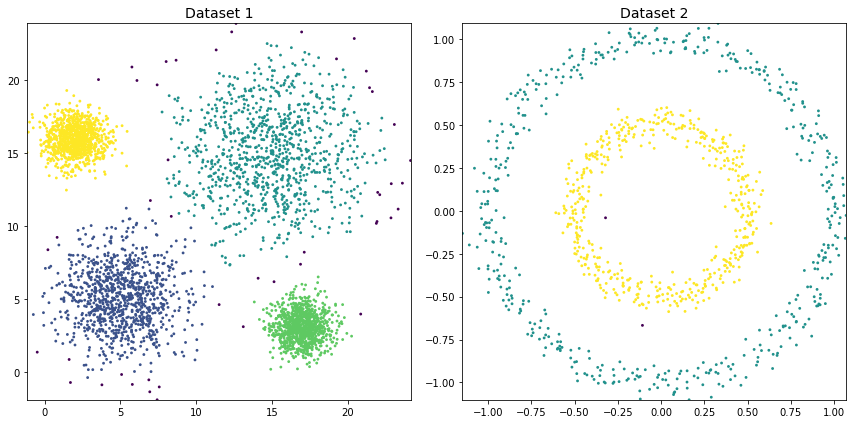

In [4]:
plot_two_cluster(dataset1, dataset2, dbscan_dataset1, dbscan_dataset2, title1 = 'Dataset 1',  title2 = 'Dataset 2')

DBSCAN correctly segmented `Dataset2` without knowing number of clusters beforehand. 

Cons of DBSCAN
In rare cases, border points can flip between clusters, depending on the order by which the data is processed, meaning different executions can return different outputs.